# Linear Programming using PuLP

### Linear Programming

- Linear programming (LP) is a method to find the maximum or the minimum in a linear mathematical model 
- Each LP problem consists of the following components: an objective function, decision variables (or control variables), and constraints.

### Example: Chairs and Tables

- Giapetto, Inc. manufactures two types of furniture: chairs and tables. The manufacturer wants to maximize their weekly profit.
- \$20 of profit per chair. 
- \$30 of profit per table.
- A chair requires 1 hour of finishing labor and 2 hours of carpentry labor.
- A table requires 2 hours of finishing labor and 1 hour of carpentry labor.
- Each week, Giapetto has only 100 finishing hours and 100 carpentry hours available.
<img src="images/chairs_tables.jpg" alt="Chairs and Tables" style="width: 300px;"/>

- $x_1$: number of chairs produced each week
- $x_2$: number of tables produced each week


\begin{align}
max \hspace{1cm} z & = 20x_1+30x_2 \\
s.t. \hspace{0.5cm} x_1+2x_2 & \leq 100 \hspace{0.5cm} (Finishing\ hours)\\
2x_1+x_2 & \leq 100 \hspace{0.5cm} (Carpentry\ hours)\\
x_1 & \geq 0 \hspace{0.5cm} (Sign\ restriction)\\
x_2 & \geq 0 \hspace{0.5cm} (Sign\ restriction)\\
\end{align}

- PuLP uses LP solvers (e.g., GLPK, COIN CLP/CBC, CPLEX, and GUROBI) to solve linear problems. 
- To install PuLP, in a Command Prompt, type in `pip install pulp`

In [1]:
from pulp import *

In [2]:
prob = LpProblem("Giapetto", LpMaximize)  # Create a LP maximization problem
x1 = LpVariable("x1", lowBound=0) # Create a variable x1 >= 0
x2 = LpVariable("x2", lowBound=0) # Create another variable x2 >= 0
prob += 20*x1 + 30*x2  # Objective function
prob += 1*x1 + 2*x2 <= 100  # Finishing hours
prob += 2*x1 + 1*x2 <= 100  # Carpentry hours
prob  # Display the LP problem

Giapetto:
MAXIMIZE
20*x1 + 30*x2 + 0
SUBJECT TO
_C1: x1 + 2 x2 <= 100

_C2: 2 x1 + x2 <= 100

VARIABLES
x1 Continuous
x2 Continuous

In [3]:
status = prob.solve()  # Solve with the default solver
LpStatus[status]  # Print the solution status

'Optimal'

In [4]:
value(x1), value(x2), value(prob.objective)  # Show the solution

(33.333333, 33.333333, 1666.6666500000001)

<IPython.core.display.Javascript object>


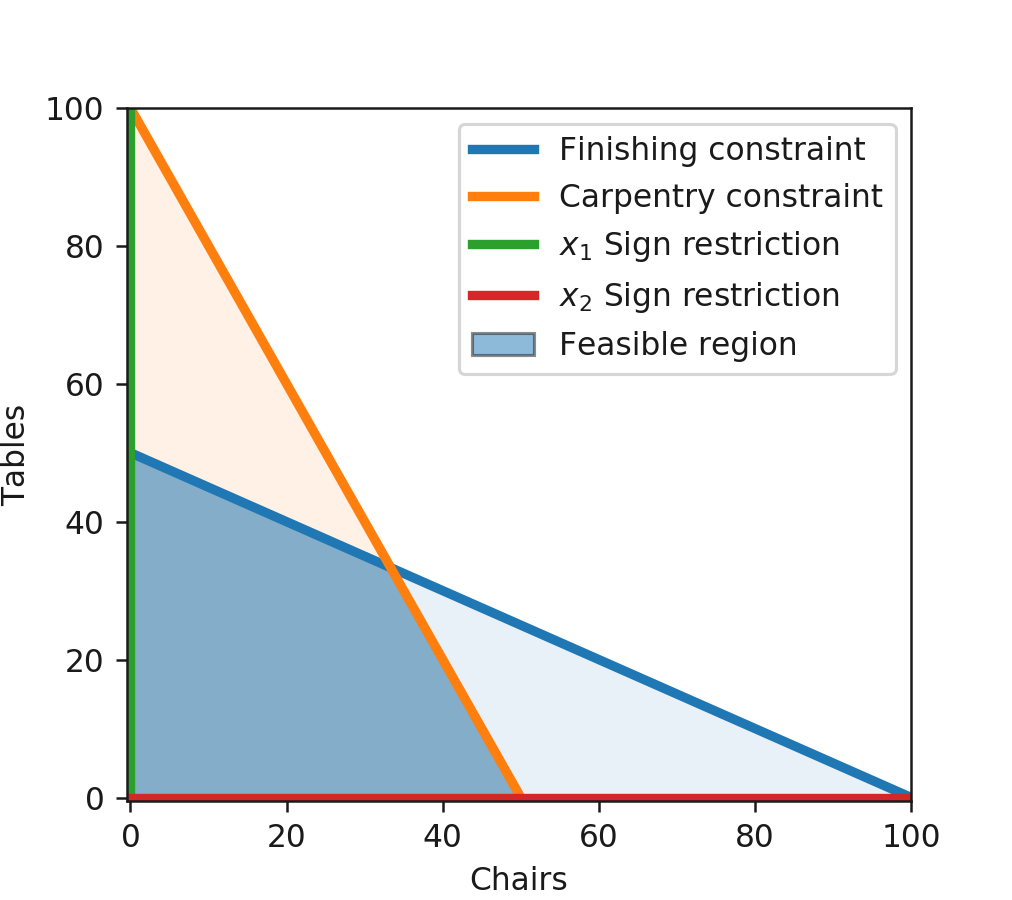

In [5]:
%matplotlib notebook
%run giapetto_feasible.py

### Integer Linear Programming (ILP)

- $x_1$: integer number of chairs produced each week
- $x_2$: integer number of tables produced each week

\begin{align}
max \hspace{1cm} z & = 20x_1+30x_2 \\
s.t. \hspace{0.5cm} x_1+2x_2 & \leq 100 \hspace{0.5cm} (Finishing\ hours)\\
2x_1+x_2 & \leq 100 \hspace{0.5cm} (Carpentry\ hours)\\
x_1 & \geq 0 \hspace{0.5cm} (Integer\ sign\ restriction)\\
x_2 & \geq 0 \hspace{0.5cm} (Integer\ sign\ restriction)\\
\end{align}

In [6]:
prob = LpProblem("Giapetto", LpMaximize)
x1 = LpVariable("x1", lowBound=0, cat='Integer') # Integer variable x1 >= 0
x2 = LpVariable("x2", lowBound=0, cat='Integer') # Integer variable x2 >= 0
prob += 20*x1 + 30*x2
prob += 1*x1 + 2*x2 <= 100
prob += 2*x1 + 1*x2 <= 100
prob

Giapetto:
MAXIMIZE
20*x1 + 30*x2 + 0
SUBJECT TO
_C1: x1 + 2 x2 <= 100

_C2: 2 x1 + x2 <= 100

VARIABLES
0 <= x1 Integer
0 <= x2 Integer

In [7]:
status = prob.solve()  # Solve with the default solver
LpStatus[status]  # Print the solution status

'Optimal'

In [8]:
value(x1), value(x2), value(prob.objective)  # Show the solution

(32.0, 34.0, 1660.0)

- Note the ILP solution is not just the rounded solutions of the continuous LP solution (33, 33, 1650)

<IPython.core.display.Javascript object>


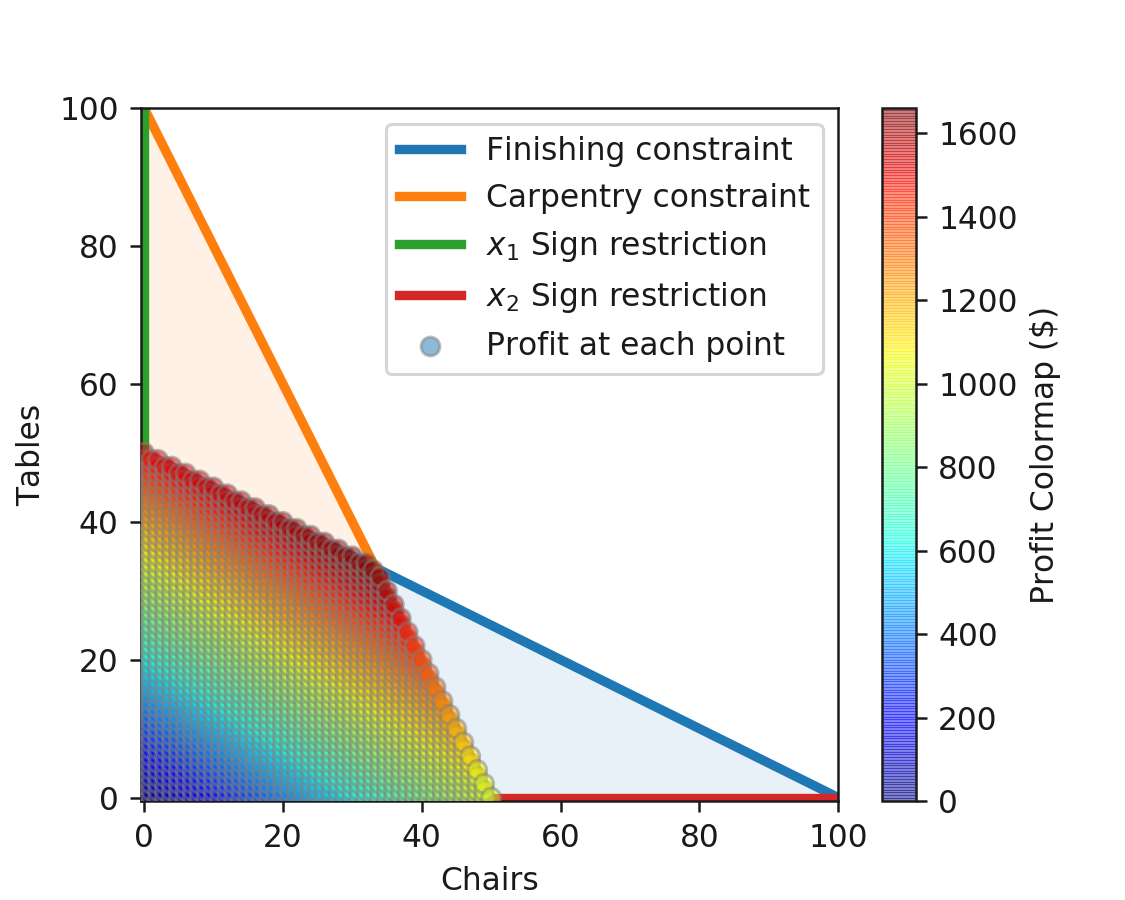

In [9]:
%run giapetto_colormap.py

### Other Examples and Operations Research Open Course

- [pyOpt: a Python-based object-oriented framework for nonlinear constrained optimization](https://pdfs.semanticscholar.org/39b2/3bd57833bb9506788a266a5eda85340dbaa1.pdf)
- [Operations Research Open Course](https://youtube.com/yongtwang)
    - Linear Programming and the Simplex Method
    - Sensitivity Analysis and Duality
    - Transportation, Transshipment, and Assignment Problems
    - Network Models
    - Integer Programming
    - Nonlinear Programming
    - Decision Making under Uncertainty
    - Game Theory
    - Inventory Theory
    - Markov Chains
    - Dynamic Programming
    - Queuing Theory
    - AMPL Software

### Course Materials on YouTube and GitHub

- Course videos are hosted by YouTube ( http://youtube.com/yongtwang ).
- Course documents (Jupyter Notebooks and Python source code) are hosted by GitHub ( http://github.com/yongtwang ).